In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prior_lambda(): 
    return np.random.gamma(0.1,1/0.1) 
 
def simulator(ld): 
    return np.random.exponential(ld, 30) 

def summary_mean(X): 
    return np.mean(X) 

In [3]:
#observation 
# Set the generating parameters that we will try to infer 
ld0 = 0.1

# Generate some data (using a fixed seed here) 
np.random.seed(20170525) 
y0 = simulator(ld0) 

In [4]:
rejSampler = pyabc.RejectionSampler(priors = [prior_lambda], simulator = simulator, observation = y0, summaries = [summary_mean])
rejSampler.sample(threshold = 0.01, nr_samples = 500)

Rejection sampler started with threshold: 0.01 and number of samples: 500
Samples:    500 - Threshold: 0.01 - Iterations:      35029 - Time:     1.49 s


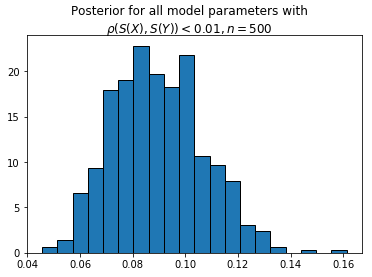

In [5]:
rejSampler.plot_marginals()

In [6]:
figure, ax = plt.subplots(1,1)
ax[0]

TypeError: 'AxesSubplot' object does not support indexing

In [ ]:
figure, ax = plt.subplots(1,1,squeeze = False)
ax[0]